In [2]:
import pandas as pd
import numpy as np
import requests
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Base URL used in all the API calls
BASE_URL = 'http://api.worldbank.org/v2/'

# List of new indicators according to the features defined
INDICATOR_CODES = [
    'NY.GDP.PCAP.CD', 'SP.POP.GROW', 'SP.URB.TOTL.IN.ZS',
    'SE.PRM.ENRR', 'SE.SEC.ENRR', 'SE.TER.ENRR',
    'SH.DYN.MORT', 'SH.STA.MMRT', 'SH.XPD.CHEX.GD.ZS',
    'EG.ELC.ACCS.ZS', 'EG.ELC.RNEW.ZS', 'EG.FEC.RNEW.ZS'
]

# New set of countries
COUNTRY_LIST = ['Russia', 'India', 'China', 'South Africa', 'Bangladesh', 'Pakistan']

# Mapping of feature codes to more meaningful names
featureMap = {
    "NY.GDP.PCAP.CD": "GDP per Capita",
    "SP.POP.GROW": "Population Growth (%)",
    "SP.URB.TOTL.IN.ZS": "Urban Population (%)",
    "SE.PRM.ENRR": "Primary School Enrollment (%)",
    "SE.SEC.ENRR": "Secondary School Enrollment (%)",
    "SE.TER.ENRR": "Tertiary School Enrollment (%)",
    "SH.DYN.MORT": "Mortality Rate Under-5 (per 1000)",
    "SH.STA.MMRT": "Maternal Mortality Ratio (per 100,000)",
    "SH.XPD.CHEX.GD.ZS": "Health Expenditure (% of GDP)",
    "EG.ELC.ACCS.ZS": "Access to Electricity (%)",
    "EG.ELC.RNEW.ZS": "Electricity from Renewable Sources (%)",
    "EG.FEC.RNEW.ZS": "Renewable Energy Consumption (%)"
}

# Mapping of country codes to their actual names
countryMap = {
    "RU": "Russia",
    "IN": "India",
    "CN": "China",
    "ZA": "South Africa",
    "BD": "Bangladesh",
    "PK": "Pakistan"
}

# Constant parameters used in sending the request.
params = {
    'format': 'json',
    'per_page': '100',
    'date': '1965:2023'
}

# Function to get JSON data from the endpoint
def loadJSONData(country_code): 
    dataList = []
    for indicator in INDICATOR_CODES: 
        url = f'{BASE_URL}countries/{country_code.lower()}/indicators/{indicator}'
        response = requests.get(url, params=params)
        if response.status_code == 200 and ("message" not in response.json()[0].keys()):
            indicatorVals = [
                float(obj['value']) if obj['value'] not in ("", None) else None 
                for obj in response.json()[1]
            ] if len(response.json()) > 1 else []
            dataList.append(indicatorVals)
        else:
            print(f"Error in loading the data for {indicator}. Status Code: {response.status_code}")
    dataList.append([year for year in range(2023, 1964, -1)])
    return dataList

# Function to invoke the loadJSONData function and form the final DataFrame for each country
def getCountrywiseDF(country_code):
    col_list = list(featureMap.values()) + ['Year']
    print(f"------------------Loading data for: {countryMap[country_code]}-----------------------")
    dataList = loadJSONData(country_code)
    df = pd.DataFrame(np.column_stack(dataList), columns=col_list)
    df['Country'] = countryMap[country_code]
    display(df.head())
    return df

# Load data for each country
dfs = {country: getCountrywiseDF(code) for country, code in zip(COUNTRY_LIST, countryMap.keys())}

print("Data Loading Completed")

------------------Loading data for: Russia-----------------------


,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%),Year,Country
0,13817.045898,-0.285218,75.331,None,None,None,None,None,None,None,None,None,2023,Russia
1,15445.242188,-0.352843,75.126,101.94931,95.677948,56.617001,4.8,None,None,100.0,None,None,2022,Russia
2,12521.522461,-0.343724,74.934,103.845192,94.669731,57.126041,5.1,None,7.39,100.0,None,3.5,2021,Russia
3,10108.327148,-0.143202,74.754,104.977188,94.500671,59.060211,5.4,14.0,7.57,99.9,None,3.7,2020,Russia
4,11447.701172,0.037947,74.587,104.132828,102.587448,83.328491,5.8,7.0,5.65,99.8,None,3.2,2019,Russia


------------------Loading data for: India-----------------------


,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%),Year,Country
0,2484.845429,0.805014,36.364,112.030998,76.541,33.117001,None,None,None,None,None,None,2023,India
1,2366.309609,0.680373,35.872,111.084,78.813004,32.669998,29.1,None,None,99.2,None,None,2022,India
2,2250.179018,0.797216,35.393,102.316002,78.063004,31.573999,30.6,None,3.28,99.6,None,34.9,2021,India
3,1915.551588,0.955221,34.926,101.291,75.109001,29.82,32.4,103.0,3.34,96.5,None,36.1,2020,India
4,2050.1638,1.025311,34.472,99.503998,75.525581,29.023001,34.3,116.0,2.95,95.9,None,33.5,2019,India


------------------Loading data for: China-----------------------


,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%),Year,Country
0,12614.060995,-0.103795,64.57,None,None,None,None,None,None,None,None,None,2023,China
1,12662.583169,-0.0131,63.56,100.17173,None,71.981552,6.6,None,None,100.0,None,None,2022,China
2,12617.505104,0.089252,62.512,99.430397,None,67.387619,7.0,None,5.383605,100.0,None,15.2,2021,China
3,10408.719554,0.238041,61.428,99.024429,None,62.236778,7.5,23.0,5.593597,100.0,None,14.9,2020,China
4,10143.860221,0.354741,60.308,98.235413,None,57.27544,8.0,20.0,5.350278,100.0,None,14.3,2019,China


------------------Loading data for: South Africa-----------------------


,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%),Year,Country
0,6253.161613,0.865465,68.819,None,None,None,None,None,None,None,None,None,2023,South Africa
1,6766.481254,0.841058,68.335,None,None,None,34.5,None,None,86.5,None,None,2022,South Africa
2,7073.612754,0.99892,67.847,98.115311,111.801964,25.356609,34.7,None,8.273091,89.3,None,9.7,2021,South Africa
3,5753.066494,1.223179,67.354,99.73526,110.017479,25.129681,35.3,127.0,8.572588,90.0,None,9.8,2020,South Africa
4,6702.526617,1.295074,66.856,101.256493,111.206802,24.019279,35.6,118.0,8.244189,85.0,None,8.7,2019,South Africa


------------------Loading data for: Bangladesh-----------------------


,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%),Year,Country
0,2529.080127,1.027465,40.473,None,None,None,None,None,None,None,None,None,2023,Bangladesh
1,2687.899063,1.074837,39.711,117.658997,71.821999,22.84,28.8,None,None,99.4,None,None,2022,Bangladesh
2,2457.964466,1.149318,38.946,115.447998,70.292999,23.4,29.8,None,2.36493,99.0,None,25.0,2021,Bangladesh
3,2233.767282,1.14421,38.177,118.429237,69.014,22.539,31.0,123.0,2.270639,96.2,None,27.2,2020,Bangladesh
4,2122.037652,1.113172,37.405,None,67.221001,22.805,32.2,157.0,2.257622,92.2,None,26.1,2019,Bangladesh


------------------Loading data for: Pakistan-----------------------


,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%),Year,Country
0,1407.021351,1.957103,38.04,None,None,13.42906,None,None,None,None,None,None,2023,Pakistan
1,1589.26398,1.893246,37.731,None,None,12.6966,61.0,None,None,95.0,None,None,2022,Pakistan
2,1506.108293,1.834062,37.44,84.367996,41.855,12.598,63.0,None,2.911316,94.9,None,41.6,2021,Pakistan
3,1322.314785,1.733028,37.165,None,None,11.94424,65.1,154.0,2.95273,94.5,None,42.7,2020,Pakistan
4,1437.165833,1.607981,36.907,83.184578,39.61665,11.347,67.3,179.0,2.847369,93.9,None,45.9,2019,Pakistan


Data Loading Completed


In [3]:
# Function to identify missing features and remove features that aren't useful
def remove_missing_features(df):
    if df is None:
        print("No DataFrame received!")
        return
    df_cp = df.copy()
    print(f"Removing missing features for: {df_cp.iloc[0]['Country']}")
    missing_percentage = df.isnull().sum() / df.shape[0] * 100
    cols_to_trim = missing_percentage[missing_percentage > 75].index.tolist()
    if cols_to_trim:
        df_cp = df_cp.drop(columns=cols_to_trim)
        print(f"Dropped Columns: {cols_to_trim}")
    else:
        print("No columns dropped")
    return df_cp


In [4]:
# Remove missing features
dfs = {country: remove_missing_features(df) for country, df in dfs.items()}

Removing missing features for: Russia
No columns dropped
Removing missing features for: India
No columns dropped
Removing missing features for: China
No columns dropped
Removing missing features for: South Africa
No columns dropped
Removing missing features for: Bangladesh
No columns dropped
Removing missing features for: Pakistan
No columns dropped


In [5]:
# Function to fill the remaining missing values with average values for numeric columns
def fill_missing_values(df):
    if df is None:
        print("No DataFrame received")
        return
    df_cp = df.copy()
    print(f"Filling missing features for: {df_cp.iloc[0]['Country']}")
    
    # Select only numeric columns for calculating mean
    numeric_cols = df_cp.select_dtypes(include=np.number).columns
    df_cp[numeric_cols] = df_cp[numeric_cols].fillna(df_cp[numeric_cols].mean())
    
    print("Filling missing values completed")
    return df_cp

# Fill missing values
dfs = {country: fill_missing_values(df) for country, df in dfs.items()}

Filling missing features for: Russia
Filling missing values completed
Filling missing features for: India
Filling missing values completed
Filling missing features for: China
Filling missing values completed
Filling missing features for: South Africa
Filling missing values completed
Filling missing features for: Bangladesh
Filling missing values completed
Filling missing features for: Pakistan
Filling missing values completed


In [6]:
# Function to change year type
def change_year_type(df):
    print(f"Changing type of Year for: {df.iloc[0]['Country']}")
    if 'Year' in df.columns:
        df['Year'] = df['Year'].astype(str)
    print("Completed changing type")
    return df

# Change year type
dfs = {country: change_year_type(df) for country, df in dfs.items()}

Changing type of Year for: Russia
Completed changing type
Changing type of Year for: India
Completed changing type
Changing type of Year for: China
Completed changing type
Changing type of Year for: South Africa
Completed changing type
Changing type of Year for: Bangladesh
Completed changing type
Changing type of Year for: Pakistan
Completed changing type


In [7]:
# Display the processed data for India as an example
dfIndia = dfs['India']
display(dfIndia.head())

print(f'Total number of features: {list(dfs.values())[0].shape[1]}')
print(list(dfs.values())[0].dtypes)


,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%),Year,Country
0,2484.845429,0.805014,36.364,112.030998,76.541,33.117001,None,None,None,None,None,None,2023,India
1,2366.309609,0.680373,35.872,111.084,78.813004,32.669998,29.1,None,None,99.2,None,None,2022,India
2,2250.179018,0.797216,35.393,102.316002,78.063004,31.573999,30.6,None,3.28,99.6,None,34.9,2021,India
3,1915.551588,0.955221,34.926,101.291,75.109001,29.82,32.4,103.0,3.34,96.5,None,36.1,2020,India
4,2050.1638,1.025311,34.472,99.503998,75.525581,29.023001,34.3,116.0,2.95,95.9,None,33.5,2019,India


Total number of features: 14
GDP per Capita                            object
Population Growth (%)                     object
Urban Population (%)                      object
Primary School Enrollment (%)             object
Secondary School Enrollment (%)           object
Tertiary School Enrollment (%)            object
Mortality Rate Under-5 (per 1000)         object
Maternal Mortality Ratio (per 100,000)    object
Health Expenditure (% of GDP)             object
Access to Electricity (%)                 object
Electricity from Renewable Sources (%)    object
Renewable Energy Consumption (%)          object
Year                                      object
Country                                   object
dtype: object


In [8]:
# Function to write processed data to CSV files
def write_data():
    assert len(countryMap) == len(dfs)
    for country_name, df_data in dfs.items():
        file_name = f"{country_name}.csv"
        try:
            df_data.to_csv(file_name, index=False)
            print(f"Successfully created: {file_name}")
        except Exception as e:
            print(f"Error in writing to {file_name}: {e}")

write_data()

Successfully created: Russia.csv
Successfully created: India.csv
Successfully created: China.csv
Successfully created: South Africa.csv
Successfully created: Bangladesh.csv
Successfully created: Pakistan.csv


In [10]:
# read the cleaned data from every CSV
try:
    df_cleaned_ru=pd.read_csv('Russia.csv')
    df_cleaned_in=pd.read_csv('India.csv')
    df_cleaned_cn=pd.read_csv('China.csv')
    df_cleaned_za=pd.read_csv('South Africa.csv')
    df_cleaned_bd=pd.read_csv('Bangladesh.csv')
    df_cleaned_pk=pd.read_csv('Pakistan.csv')
    print("Successfully read all the files")
except:
    # handling I/O exceptions
    print("Unexpected error in reading a file. Check the file path and if a file exists with the name given.")

# display data of one country to check if the cleaned data is loaded
print("Displaying data for India: ")
display(df_cleaned_in.head())

# create a list of clean dataframes for further analysis
list_cleaned_df=[df_cleaned_ru, df_cleaned_in, df_cleaned_cn, df_cleaned_za, df_cleaned_bd, df_cleaned_pk]

Successfully read all the files
Displaying data for India: 


,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%),Year,Country
0,2484.845429,0.805014,36.364,112.030998,76.541000,33.117001,NaN,NaN,NaN,NaN,NaN,NaN,2023,India
1,2366.309609,0.680373,35.872,111.084000,78.813004,32.669998,29.1,NaN,NaN,99.2,NaN,NaN,2022,India
2,2250.179018,0.797216,35.393,102.316002,78.063004,31.573999,30.6,NaN,3.28,99.6,NaN,34.9,2021,India
3,1915.551588,0.955221,34.926,101.291000,75.109001,29.820000,32.4,103.0,3.34,96.5,NaN,36.1,2020,India
4,2050.163800,1.025311,34.472,99.503998,75.525581,29.023001,34.3,116.0,2.95,95.9,NaN,33.5,2019,India


In [11]:
combined_df=pd.concat(list_cleaned_df,sort=False)
combined_df.head(200)

,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%),Year,Country
0,13817.045898,-0.285218,75.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,Russia
1,15445.242188,-0.352843,75.126,101.949310,95.677948,56.617001,4.8,NaN,NaN,100.0,NaN,NaN,2022,Russia
2,12521.522461,-0.343724,74.934,103.845192,94.669731,57.126041,5.1,NaN,7.390000,100.0,NaN,3.5,2021,Russia
3,10108.327148,-0.143202,74.754,104.977188,94.500671,59.060211,5.4,14.0,7.570000,99.9,NaN,3.7,2020,Russia
4,11447.701172,0.037947,74.587,104.132828,102.587448,83.328491,5.8,7.0,5.650000,99.8,NaN,3.2,2019,Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,5893.187076,0.945094,59.536,97.628387,78.046753,NaN,79.0,221.0,6.862162,80.8,0.665138,9.7,2005,South Africa
19,5268.278576,0.935290,58.993,96.866989,77.429749,NaN,77.5,232.0,6.938416,80.6,0.508031,11.0,2004,South Africa
20,4095.683700,0.924209,58.446,95.131943,76.412491,NaN,76.3,205.0,7.040982,78.8,0.417733,11.8,2003,South Africa
21,2708.423333,0.910101,57.898,93.328621,76.912277,NaN,75.1,193.0,6.677745,76.7,1.208799,13.3,2002,South Africa


In [12]:
# create a copy so that the original DF is not affected
# drop the columns year and country
df_copy=combined_df.drop(['Year', 'Country'], axis='columns')
df_copy.describe()

,GDP per Capita,Population Growth (%),Urban Population (%),Primary School Enrollment (%),Secondary School Enrollment (%),Tertiary School Enrollment (%),Mortality Rate Under-5 (per 1000),"Maternal Mortality Ratio (per 100,000)",Health Expenditure (% of GDP),Access to Electricity (%),Electricity from Renewable Sources (%),Renewable Energy Consumption (%)
count,331.000000,354.000000,354.000000,260.000000,228.000000,244.000000,335.000000,126.000000,132.000000,170.000000,156.000000,192.000000
mean,2294.596912,1.628285,40.012090,93.301281,56.694197,22.157210,86.968060,164.682540,4.309546,80.330137,15.271997,29.417708
std,3287.765408,1.009945,19.462333,19.439847,28.709875,23.182437,66.147034,121.567473,1.900538,22.214445,11.098103,19.745154
min,89.201348,-0.460024,6.211000,45.990639,15.092020,0.127250,4.800000,7.000000,1.772019,9.905419,0.084217,3.200000
25%,284.252336,0.869412,24.818500,81.399370,31.034570,4.880123,32.350000,42.250000,2.565470,70.314013,3.710420,9.775000
50%,828.594691,1.589950,33.924500,99.009949,51.898449,11.659755,68.600000,166.000000,4.020000,86.700000,16.539042,30.400000
75%,2722.997677,2.371718,57.248750,106.729853,82.639433,35.525173,127.500000,231.500000,5.292500,98.375000,19.300308,47.100000
max,15941.448242,4.423125,75.331000,134.326111,111.801964,85.270142,367.200000,441.000000,8.572588,100.000000,44.926074,73.100000


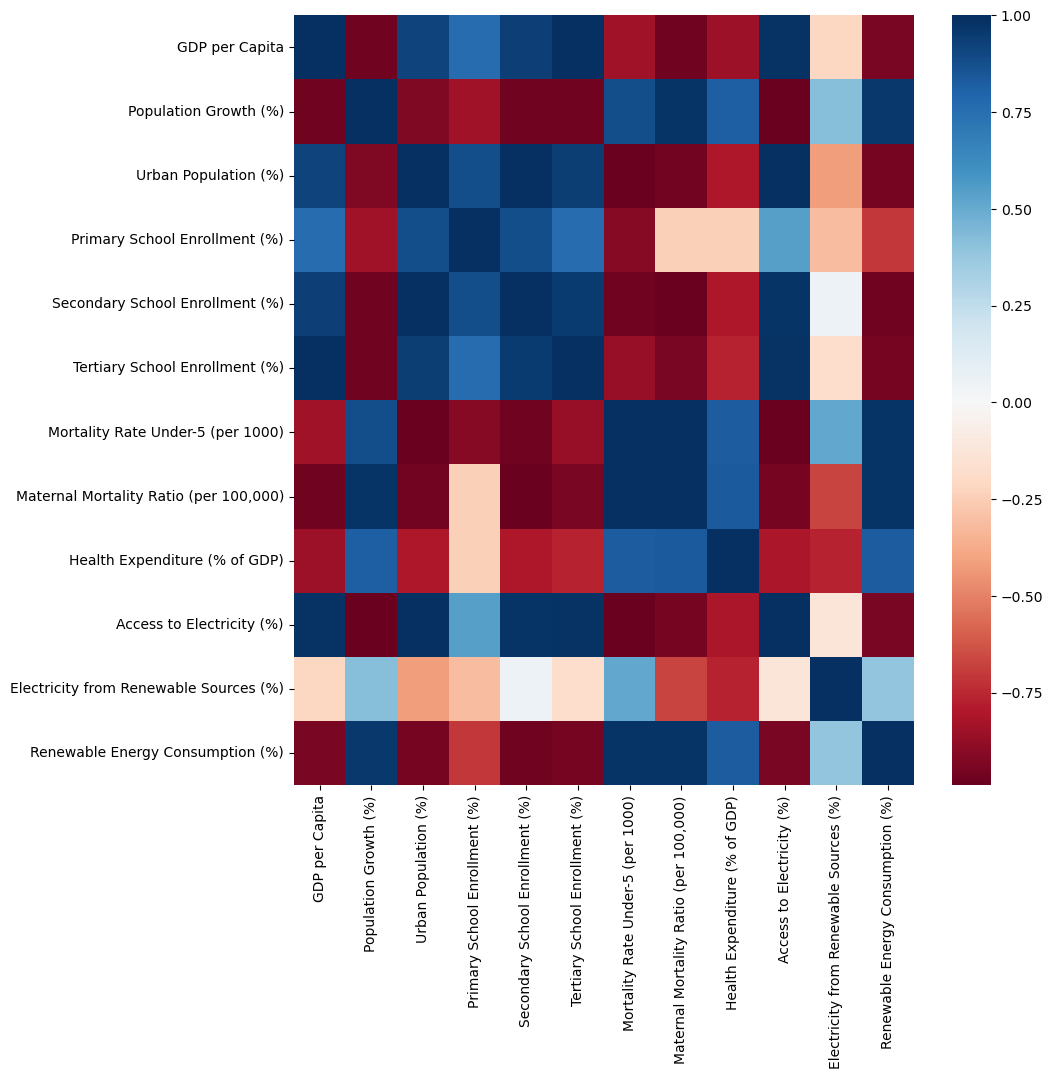

In [13]:
# create a copy
df_cleaned_in_copy=df_cleaned_in.copy()
# Exclude the categorical features from the matrix
df_cleaned_in_copy.drop(['Year', 'Country'], inplace=True, axis='columns')

# plot a correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_cleaned_in_copy.corr(), cmap='RdBu', center=0,ax=ax)
plt.savefig('Correlation.png')
plt.show()

In [16]:
# Initialize two dataframes df_00 - year 2000, df_18 - year 2018
df_00 = pd.DataFrame()
df_18 = pd.DataFrame()

# For each dataframe in the list of cleaned dataframes
for i, df in enumerate(list_cleaned_df):
    # Pick the value of GDP per Capita for year 2000 and 2018
    df_00[COUNTRY_LIST[i]] = df[df['Year'] == 2000]["GDP per Capita"]
    df_18[COUNTRY_LIST[i]] = df[df['Year'] == 2018]["GDP per Capita"]

# Transpose the dataframes to have countries as columns and years as rows
df_00 = df_00.T
df_18 = df_18.T

# Set the display format for floats
pd.options.display.float_format = '{:,.1f}'.format

# Rename the columns to the year
df_00 = df_00.rename(columns={0: 2000})
df_18 = df_18.rename(columns={0: 2018})

# Join the dataframes for both the years
df_both_years = df_00.join(df_18)

# Add 'Countries' column based on index
df_both_years['Countries'] = df_both_years.index

# Reset the index
df_both_years = df_both_years.reset_index(drop=True)

print("GDP per Capita for 2000 and 2018 for all countries: ")
display(df_both_years)


GDP per Capita for 2000 and 2018 for all countries: 


,23,5,Countries
0,"1,771.6","11,211.9",Russia
1,442.0,"1,974.4",India
2,959.4,"9,905.4",China
3,"3,241.7","7,067.7",South Africa
4,413.1,"1,963.3",Bangladesh
5,644.5,"1,620.7",Pakistan


<Figure size 1000x600 with 0 Axes>

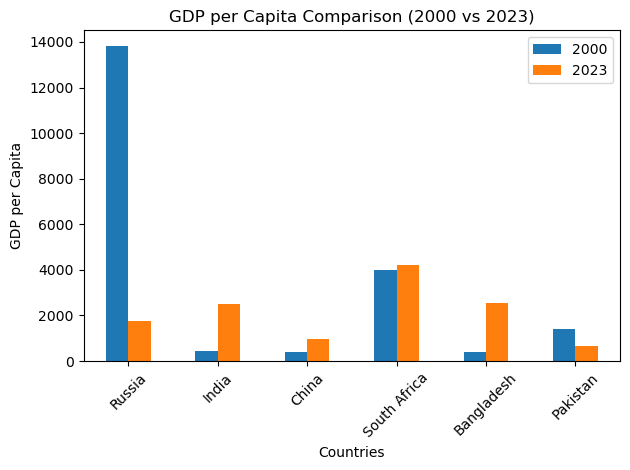

In [17]:
data = {
    'Countries': ['Russia', 'India', 'China', 'South Africa', 'Bangladesh', 'Pakistan'],
    2000: [13817.0459, 442.0353304, 413.1001853, 4000, 413.1001853, 1407.021351],  # Replace with actual GDP per Capita values
    2023: [1771.594116, 2484.845429, 959.3604314, 4200, 2529.080127, 644.457157]   # Replace with actual GDP per Capita values
}

df_both_years = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(10, 6))
df_both_years.plot(kind='bar', x='Countries', y=[2000, 2023])

plt.title('GDP per Capita Comparison (2000 vs 2023)')
plt.xlabel('Countries')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45)
plt.legend(['2000', '2023'])
plt.tight_layout()
plt.show()

Avg. GDP per Capita


,Avg. GDP per Capita,Country
4,"7,291.6",Russia
5,"3,859.3",South Africa
1,"2,617.2",China
2,703.7,India
3,632.9,Pakistan
0,610.8,Bangladesh


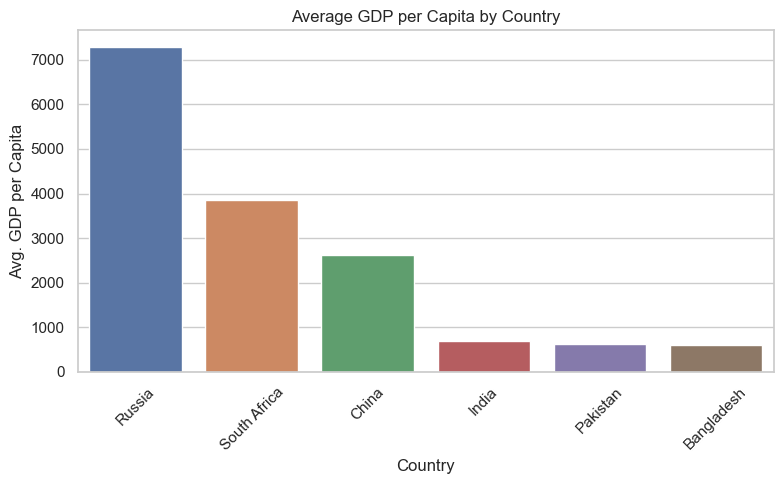

Avg. Population Growth (%)


,Avg. Population Growth (%),Country
3,2.6,Pakistan
5,2.0,South Africa
0,1.9,Bangladesh
2,1.8,India
1,1.2,China
4,0.2,Russia


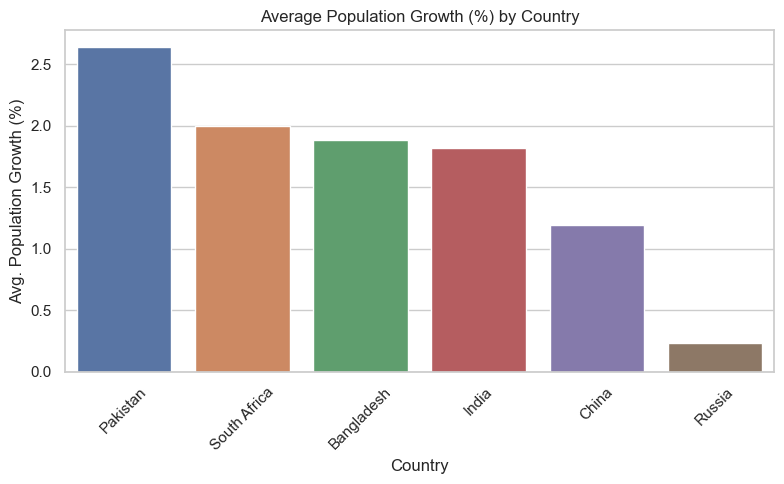

In [18]:
def group_df(feature):
    # create a new dataframe
    df_grouped=pd.DataFrame()

    # find average for each country
    df_grouped['Avg. ' + feature]=combined_df.groupby('Country')[feature].mean()

    # set the index as a column - countries
    df_grouped['Country']=df_grouped.index

    # drop the index
    df_grouped.reset_index(drop=True, inplace=True)

    # sort the rows based on Avg feature
    df_grouped.sort_values('Avg. '+feature, inplace=True, ascending=False)

    print("Avg. " + feature)
    display(df_grouped)
    
    return df_grouped

def plot_bar(df, x_feature, y_feature):
    # bar plot
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")
    ax = sns.barplot(
        data=df,
        x=x_feature,
        y="Avg. " + y_feature)
    ax.set_title('Average ' + y_feature + ' by Country')
    ax.set_xlabel('Country')
    ax.set_ylabel('Avg. ' + y_feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage with GDP per Capita
df_gdp = group_df('GDP per Capita')
plot_bar(df_gdp, 'Country', 'GDP per Capita')

print("========================================================")

# Example usage with Population Growth (%)
df_pop_growth = group_df('Population Growth (%)')
plot_bar(df_pop_growth, 'Country', 'Population Growth (%)')

Few records from the Dataframe containing Year, GDP per Capita and Country:


,Year,GDP per Capita,Country
0,2023,"13,817.0",Russia
1,2022,"15,445.2",Russia
2,2021,"12,521.5",Russia
3,2020,"10,108.3",Russia
4,2019,"11,447.7",Russia


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


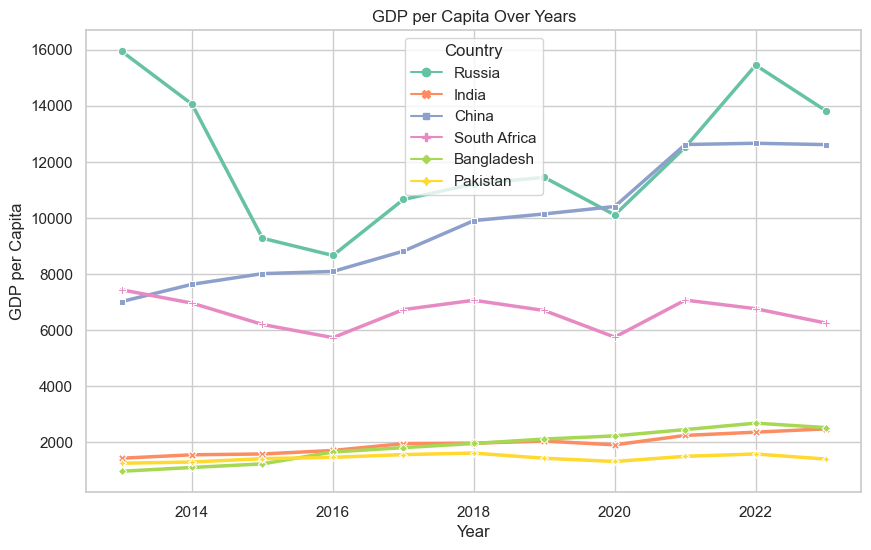

In [19]:
# Assuming you have separate dataframes for each country's GDP per Capita

# Function to form a dataframe with Year, GDP per Capita and Country
def extract_columns(df_cleaned):
    df = pd.DataFrame()
    # Pick data for the recent 10 years, note that the data is sorted in descending order of year
    df['Year'] = df_cleaned.loc[:10, 'Year']
    df['GDP per Capita'] = df_cleaned.loc[:10, 'GDP per Capita']
    df['Country'] = df_cleaned.loc[:10, 'Country']
    return df

# Function to fetch a single dataframe with GDP per Capita from each country
def form_gdp_df():
    # Function call to extract_columns()
    rdf = extract_columns(df_cleaned_ru)
    idf = extract_columns(df_cleaned_in)
    cdf = extract_columns(df_cleaned_cn)
    saf = extract_columns(df_cleaned_za)
    bdf = extract_columns(df_cleaned_bd)
    pdf = extract_columns(df_cleaned_pk)
    
    # Combine the dataframes into a single dataframe with 3 columns
    gdp_df = pd.concat([rdf, idf, cdf, saf, bdf, pdf], ignore_index=True)
    return gdp_df

# Get the combined DF
gdp_df = form_gdp_df()

print("Few records from the Dataframe containing Year, GDP per Capita and Country:")
display(gdp_df.head())

# Set figure size
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot using seaborn library
ax = sns.lineplot(x='Year', y='GDP per Capita', hue='Country', style="Country", palette="Set2", markers=True, dashes=False, data=gdp_df, linewidth=2.5)
plt.title('GDP per Capita Over Years')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.legend(title='Country')
plt.show()


Few records from the selected features: 


,GDP per Capita,Access to Electricity (%),Electricity from Renewable Sources (%),Country
0,"2,484.8",NaN,NaN,India
1,"2,366.3",99.2,NaN,India
2,"2,250.2",99.6,NaN,India
3,"1,915.6",96.5,NaN,India
4,"2,050.2",95.9,NaN,India


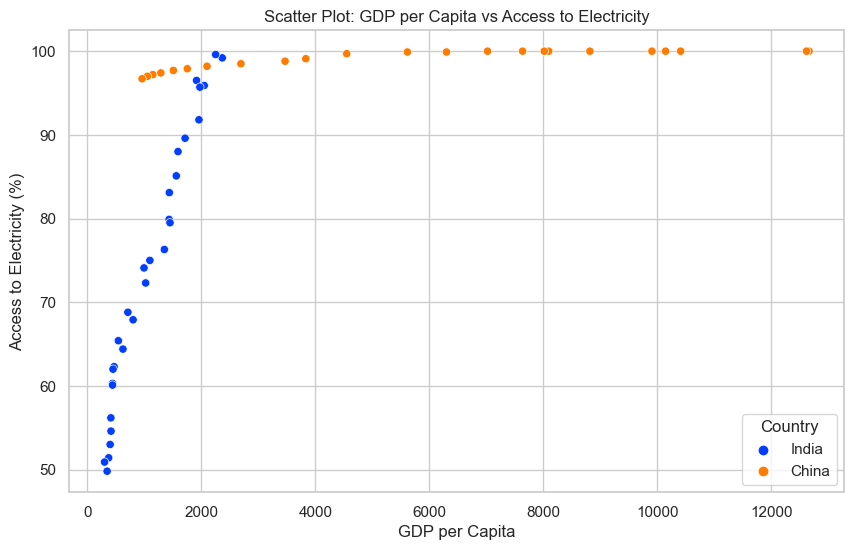

In [20]:
# Function to extract specific columns from the DFs for India and China
def form_in_cn_df():
    # For India
    indf = df_cleaned_in[['GDP per Capita', 'Access to Electricity (%)', 'Electricity from Renewable Sources (%)', 'Country']]
    
    # For China
    cndf = df_cleaned_cn[['GDP per Capita', 'Access to Electricity (%)', 'Electricity from Renewable Sources (%)', 'Country']]
    
    # Combine the two dataframes
    in_cn_df = pd.concat([indf, cndf])
    return in_cn_df

# Get the desired data
in_cn_df = form_in_cn_df()
print("Few records from the selected features: ")
display(in_cn_df.head())

# Scatter plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot using seaborn library
ax = sns.scatterplot(x='GDP per Capita', y='Access to Electricity (%)', hue='Country', palette="bright", data=in_cn_df)
plt.title('Scatter Plot: GDP per Capita vs Access to Electricity')
plt.xlabel('GDP per Capita')
plt.ylabel('Access to Electricity (%)')
plt.legend(title='Country')
plt.show()


Selected features data for 2015: 


,GDP per Capita,Access to Electricity (%),Electricity from Renewable Sources (%),Countries
0,"9,277.7",95.5,15.9,Russia
2,"8,016.4",100.0,23.9,China
3,"6,204.9",85.3,2.3,South Africa
1,"1,590.2",88.0,15.3,India
5,"1,421.8",91.0,31.4,Pakistan
4,"1,236.4",74.0,1.2,Bangladesh


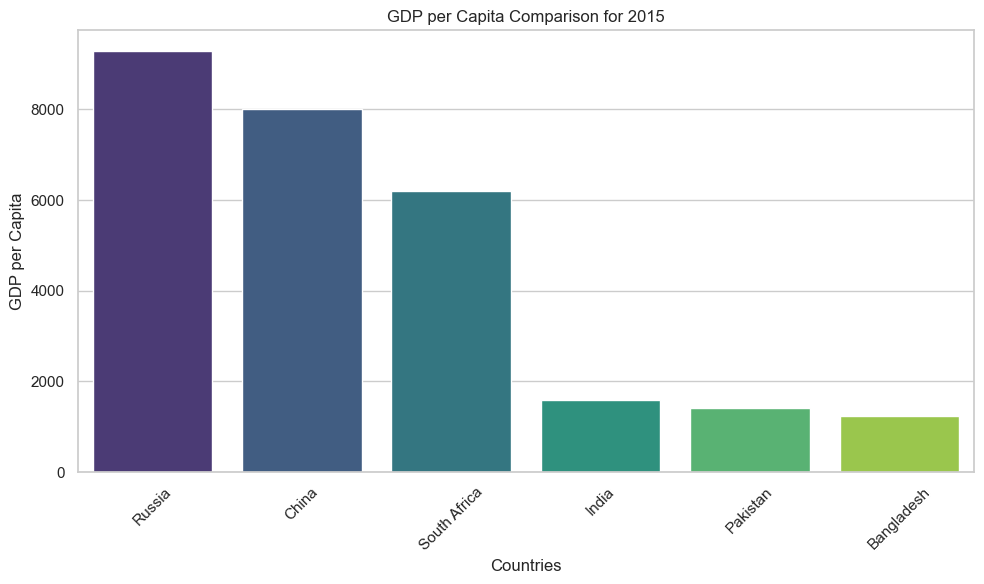

In [21]:
# Get the list of countries
list_countries = COUNTRY_LIST

df_features = pd.DataFrame()

# Iterate over the dataframe
for i, df in enumerate(list_cleaned_df):
    # Store the values for GDP per Capita, Access to Electricity (%), and Electricity from Renewable Sources (%) for each country
    df_features[list_countries[i]] = df[df['Year'] == 2015][['GDP per Capita', 'Access to Electricity (%)', 'Electricity from Renewable Sources (%)']].iloc[0]

# Take the transpose
df_features = df_features.T

pd.options.display.float_format = '{:,.1f}'.format  # Set other global format

# Since we took a transpose to get countries as the rows, the row index shows the names of the countries.
# Add it as a column in the DF
df_features['Countries'] = df_features.index
# Drop the index
df_features.reset_index(drop=True, inplace=True)

# Sort the rows based on GDP per Capita (assuming descending order)
df_features.sort_values('GDP per Capita', inplace=True, ascending=False)

print("Selected features data for 2015: ")
display(df_features)

# Bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot using seaborn library
ax = sns.barplot(
    data=df_features,
    x='Countries',
    y='GDP per Capita',
    palette="viridis"
)
plt.title('GDP per Capita Comparison for 2015')
plt.xlabel('Countries')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
